# PROJECT SUBMISSION BY SUJATHA PATEL

Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited
                                    Problem statement (Term Deposit Sale)
Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.
Resources Available
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

                                                                                                        
2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

Deliverable – 2 (Prepare the data for analytics) – (10)
Ensure the attribute types are correct. If not, take appropriate actions.
Get the data model ready.
Transform the data i.e. scale / normalize if required
Create the training set and test set in ratio of 70:30

                                                                                        
Deliverable – 3 (create the ensemble model) – (30)
First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited
Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

Attribute information
Input variables:
Bank client data:
age: Continuous feature
job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
marital: marital status (married, single, divorced)
education: education level (primary, secondary, tertiary)
default: has credit in default?
housing: has housing loan?
loan: has personal loan?
balance in account

Related to previous contact:
contact: contact communication type
month: last contact month of year
day: last contact day of the month
duration: last contact duration, in seconds*
                                                                                                        
Other attributes:
campaign: number of contacts performed during this campaign and for this client
pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
previous: number of contacts performed before this campaign and for this client
poutcome: outcome of the previous marketing campaign

Output variable (desired target):
Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [1]:
import warnings

import os

#Panda library for importing DataFrame
import pandas as pd

import numpy as np

#Visulization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing Machine Learning parameters and classifiers 
import scipy.stats as stats
from scipy.stats import zscore

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, auc

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Ensemble classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier



In [2]:
def convert_cat_num(df,cols):
    return pd.concat([df.drop(cols, 1), pd.get_dummies(df[cols],prefix=cols)], axis = 1)

In [3]:
df = pd.read_csv("bank-full.csv")

# DELIVERABLE 1
## 1.1 Exploratory Data Quality Report

In [4]:
print("Rows & Columns of Dataset")
df.shape

Rows & Columns of Dataset


(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are two format of data types:
    
object: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, Target

int64: It represents the integer variables. Integer variables in our dataset are: age, balance, day, duration, campaign, pdays, previous

In [6]:
# Print the top 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Any Missing Values?

### Checking for NULL VALUES

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
target='Target'
non_features=[target]
#cat_features=[col for col in df.select_dtypes('object').columns if col not in non_features]
cat_features = list(df.select_dtypes(include=['object']))
num_features=[col for col in df.select_dtypes(np.number).columns if col not in non_features]

##### Observation - No NULL VALUES in the given dataset

### Checking for MISSING Values

In [9]:
### categorical
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target']

In [10]:
# Printing Unique Values 
for i in df.columns:
    print("\n",i," :-",df[i].nunique()," Unique Values Exists")
    print('==='*25,)
    print(df[i].unique())


 age  :- 77  Unique Values Exists
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

 job  :- 12  Unique Values Exists
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

 marital  :- 3  Unique Values Exists
['married' 'single' 'divorced']

 education  :- 4  Unique Values Exists
['tertiary' 'secondary' 'unknown' 'primary']

 default  :- 2  Unique Values Exists
['no' 'yes']

 balance  :- 7168  Unique Values Exists
[ 2143    29     2 ...  8205 14204 16353]

 housing  :- 2  Unique Values Exists
['yes' 'no']

 loan  :- 2  Unique Values Exists
['no' 'yes']

 contact  :- 3  Unique Values Exists
['unknown' 'cellular' 'telephone']

 day  :- 31  Unique Values Exists
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27

In [11]:
df.groupby(['pdays'])['pdays'].count()    # no records in 999 and -1 is not explained in the link

pdays
-1      36954
 1         15
 2         37
 3          1
 4          2
        ...  
 838        1
 842        1
 850        1
 854        1
 871        1
Name: pdays, Length: 559, dtype: int64

In [12]:
df.groupby(['pdays'])['previous'].sum().reset_index()

,pdays,previous
0,-1,0
1,1,59
2,2,105
3,3,6
4,4,2
...,...,...
554,838,3
555,842,1
556,850,2
557,854,2


### Observation  
#### Based on the attributes explained https://archive.ics.uci.edu/ml/datasets/Bank+Marketing - i have observed the following

1 - age (numeric) <i><b> - ranges from 20-90.  we shall see the distribution of age later </i></b>

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <i><b>- unknown value exists and to be treated </i></b>

3 - marital : marital status (categorical: 'divorced','married','single','unknown';) <i><b>- unknown value exists and to be treated </i></b>

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <i><b> - the values in the dataset not as defined in this link. It may be over a period of time, the ducation might have been re-classified as in hte Dataset. Unknown values exists and to be treated. </i></b>

5 - default: has credit in default? (categorical: 'no','yes','unknown') <i><b> - the data is clean and no unknown values.</i></b>

6 - housing: has housing loan? (categorical: 'no','yes','unknown') <i><b> - the data is clean and no unknown values. </i></b>

7 - loan: has personal loan? (categorical: 'no','yes','unknown') <i><b> - the data is clean and no unknown values </i></b>
<i><b> 
 
##### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') <i><b> - unknown value exists and to be replaced. </i></b>

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <i><b> - the data is clean and no unknown values. </i></b>

10 - day: the day of the month <i><b> - the data is clean and no unknown values </i></b>

11 - duration: last contact duration, in seconds (numeric). <i><b> Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. </i></b>
        

##### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <i><b> the data is clean and no unknown values </i></b>

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) <i><b> need to further validate -1 days which is not explained in the link. Based on the above analysis when the previous contact is 0, the pdays denotes as -1 </i></b> 

14 - previous: number of contacts performed before this campaign and for this client (numeric) <b><i> - the data is clean and no null values </i></b>

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') <i><b> additional values found with 'other' and 'unknown'. 'unknown' to be replaced </i></b>
    

### UNIVARIATE ANALYSIS (Before Treating UNKNOWNs)

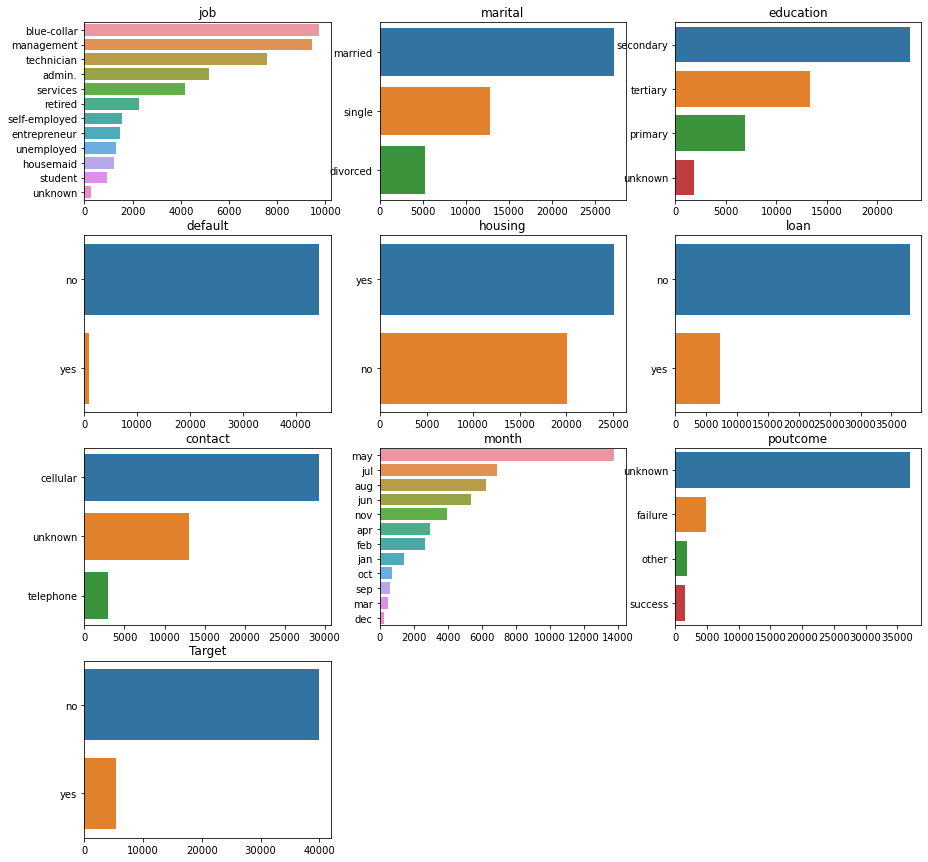

In [13]:
# Before Treating UNKNOWN Values

plt.figure(figsize=(15,15))
for i,col in enumerate(cat_features,start=1):
    plt.subplot(4,3,i);
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)

#### Observation
#### Most of the columns are skewed and unknown values exists. We will treat the unknown vlaues and analyse further

In [14]:
# There are UNKNOWN values exists in some of the attributes, let us analyse in detail 
column_with_unkown=[]

for col in df.columns:
    if 'unknown' in df[col].values:
        column_with_unkown.append(col)
        
print("List of Columns with unknown values:",column_with_unkown) 

List of Columns with unknown values: ['job', 'education', 'contact', 'poutcome']


C:\Users\Surya\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [15]:
# Compare the UNKNOWN counts against the other attributes of the columns
for col in column_with_unkown:
    print("===",col,"===")
    print(df.groupby(df[col])[col].count(),"\n")

=== job ===
job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64 

=== education ===
education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64 

=== contact ===
contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 

=== poutcome ===
poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



df[cat_features].describe().T

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Treatment of MISSING/UNKNOWN Values

### Treatment of UNKNOWN JOBS

In [17]:
# Printing UNKNOWN VALUES of Jobs by Education
df.groupby('education')['job'].value_counts()  

education  job          
primary    blue-collar      3758
           retired           795
           housemaid         627
           services          345
           management        294
           unemployed        257
           admin.            209
           entrepreneur      183
           technician        158
           self-employed     130
           unknown            51
           student            44
secondary  blue-collar      5371
           technician       5229
           admin.           4219
           services         3457
           management       1121
           retired           984
           unemployed        728
           self-employed     577
           entrepreneur      542
           student           508
           housemaid         395
           unknown            71
tertiary   management       7801
           technician       1968
           self-employed     833
           entrepreneur      686
           admin.            572
           retired

In [18]:
# Find the median age of retired based on the history
df[df['job']=='retired']['age'].median()

59.0

In [19]:
# replacing the unknown jobs with 'retired' for those who is > above 58 as its the median of retired age group
df.loc[(df['age']>=(df[df['job']=='retired']['age'].median())) & (df['job']=='unknown'), 'job'] = 'retired'

In [20]:
# find the records of UNKNOWN JOBs 
education_values = df[df.education != 'unknown']['education'].unique()

for i in education_values:
    print(df.loc[(df.job =='unknown') & (df.education == i),'job'])

2841     unknown
4008     unknown
8965     unknown
9375     unknown
10836    unknown
11005    unknown
11111    unknown
11577    unknown
11973    unknown
12112    unknown
12841    unknown
19571    unknown
20208    unknown
21653    unknown
22525    unknown
22633    unknown
23158    unknown
25966    unknown
27452    unknown
28419    unknown
31197    unknown
31237    unknown
33995    unknown
40196    unknown
40399    unknown
41267    unknown
41542    unknown
42694    unknown
42786    unknown
43744    unknown
44362    unknown
44714    unknown
Name: job, dtype: object
2723     unknown
6163     unknown
6558     unknown
7367     unknown
8673     unknown
          ...   
42243    unknown
42986    unknown
43694    unknown
44142    unknown
44544    unknown
Name: job, Length: 64, dtype: object
1072     unknown
1292     unknown
3324     unknown
5692     unknown
5939     unknown
8828     unknown
8839     unknown
9008     unknown
9215     unknown
9373     unknown
9645     unknown
9707     unknown
101

In [21]:
# replacing the UNKNOWN JOBS based on the education JOB'S MODE Value 
education_values = df.education.unique()
for i in education_values:
    df.loc[((df.job =='unknown') & (df.education == i)),'job'] = df[df.education == i].job.mode()[0]

In [22]:
# replacig the UNKNOWN JOBS which has UNKNOWN EDUCAITON based on the overall mode of JOBS
df.loc[(df.job =='unknown'),'job']=df.job.mode()[0]

In [23]:
# RE-CHECK any more UNKNOWN JOBS 
df.groupby('education')['job'].value_counts()  

education  job          
primary    blue-collar      3804
           retired           800
           housemaid         627
           services          345
           management        294
           unemployed        257
           admin.            209
           entrepreneur      183
           technician        158
           self-employed     130
           student            44
secondary  blue-collar      5435
           technician       5229
           admin.           4219
           services         3457
           management       1121
           retired           991
           unemployed        728
           self-employed     577
           entrepreneur      542
           student           508
           housemaid         395
tertiary   management       7833
           technician       1968
           self-employed     833
           entrepreneur      686
           admin.            572
           retired           373
           unemployed        289
           student

### Treatment of UNKNOWN EDUCATION Values

In [24]:
# Printing UNKNOWN EDUCATION Values by Job
df.groupby('job')['education'].value_counts()

job            education
admin.         secondary    4219
               tertiary      572
               primary       209
               unknown       171
blue-collar    secondary    5435
               primary      3804
               unknown       560
               tertiary      149
entrepreneur   tertiary      686
               secondary     542
               primary       183
               unknown        76
housemaid      primary       627
               secondary     395
               tertiary      173
               unknown        45
management     tertiary     7833
               secondary    1121
               primary       294
               unknown       242
retired        secondary     991
               primary       800
               tertiary      373
               unknown       140
self-employed  tertiary      833
               secondary     577
               primary       130
               unknown        39
services       secondary    3457
               pri

In [25]:
# Finding the highest job for each education category
df.groupby('education')['job'].value_counts()

education  job          
primary    blue-collar      3804
           retired           800
           housemaid         627
           services          345
           management        294
           unemployed        257
           admin.            209
           entrepreneur      183
           technician        158
           self-employed     130
           student            44
secondary  blue-collar      5435
           technician       5229
           admin.           4219
           services         3457
           management       1121
           retired           991
           unemployed        728
           self-employed     577
           entrepreneur      542
           student           508
           housemaid         395
tertiary   management       7833
           technician       1968
           self-employed     833
           entrepreneur      686
           admin.            572
           retired           373
           unemployed        289
           student

In [26]:
# REPLACING education based on the job's mode value of education in the highest value counts by job
#job_values = df[df.job != 'unknown']['job'].unique()

job_values = ['management','blue-collar','technician','admin.','services','retired','self-employed','entrepreneur','unemployed','housemaid','student']

for i in job_values:
    df.loc[((df.education=='unknown') & (df.job==i)),'education'] = df[df.job==i]['education'].mode()[0]

In [27]:
# RE-CHECKING of UNKNOWN EDUCATION Values
df.groupby('job')['education'].value_counts()

job            education
admin.         secondary    4390
               tertiary      572
               primary       209
blue-collar    secondary    5995
               primary      3804
               tertiary      149
entrepreneur   tertiary      762
               secondary     542
               primary       183
housemaid      primary       672
               secondary     395
               tertiary      173
management     tertiary     8075
               secondary    1121
               primary       294
retired        secondary    1131
               primary       800
               tertiary      373
self-employed  tertiary      872
               secondary     577
               primary       130
services       secondary    3607
               primary       345
               tertiary      202
student        secondary     671
               tertiary      223
               primary        44
technician     secondary    5471
               tertiary     1968
               pri

##### *** Now, let's look at the distribution of the Target variable. As it is a Categorical Variable, let us look at its frequency table, percentage distribution and bar plot.***

## UNIVARIATE ANALYSIS (After treating UNKNOWNs)

In [28]:
# Target column distribution
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [29]:
# Normalize can be set to True to print proportions instead of number 
df['Target'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

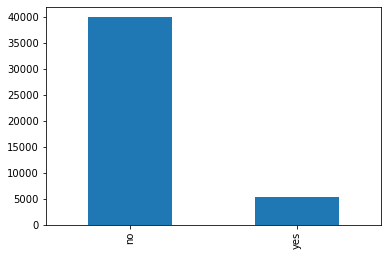

In [30]:
# plotting the bar plot of frequencies
df['Target'].value_counts().plot.bar()

So, *5289* users out of total *45211* have subscribed which is around *12%*. 

Let us analyze individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look at the distribution of age variable to see how many people belongs to a particular age group.

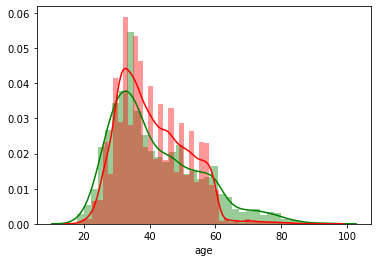

In [31]:
# Distribution of Age Group by Target Value
#sns.distplot(df.age)
sns.distplot(df[df.Target == 'yes']['age'], color = 'g')
sns.distplot(df[df.Target == 'no']['age'], color = 'r')

### Observation
#### Most of the clients fall in the age group between 20 to 60

# BIVARIATE ANALYSIS

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']


<Figure size 1080x1080 with 0 Axes>

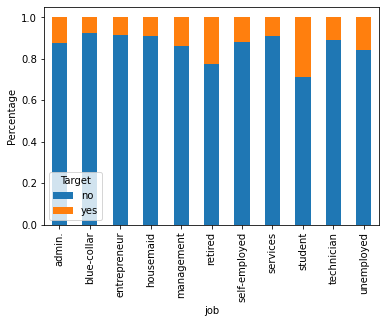

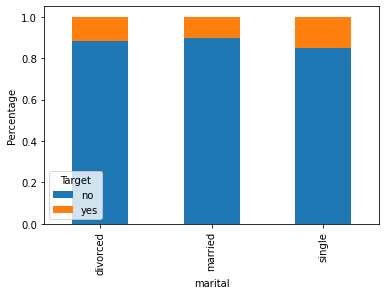

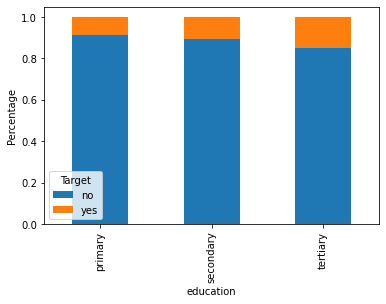

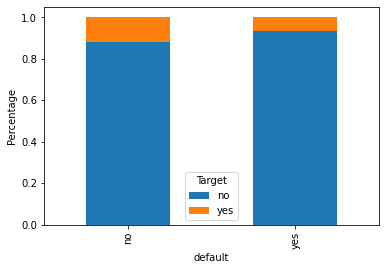

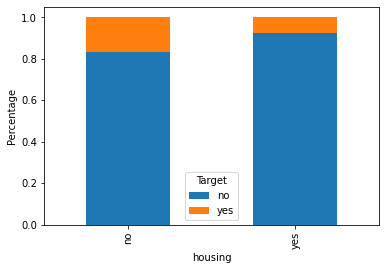

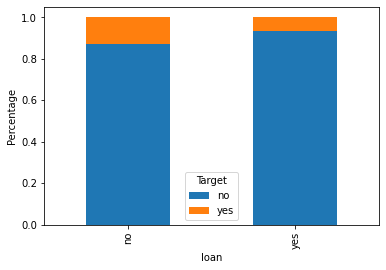

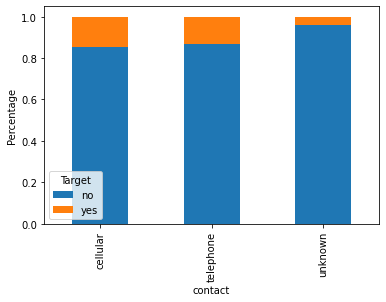

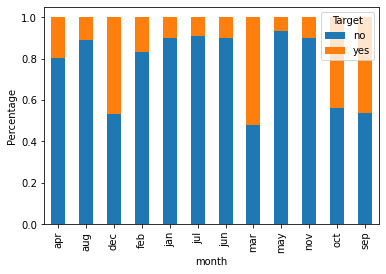

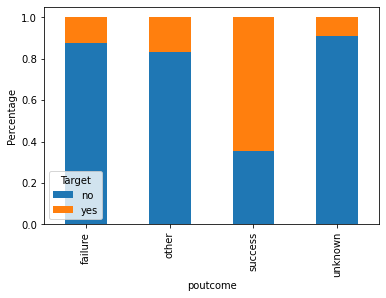

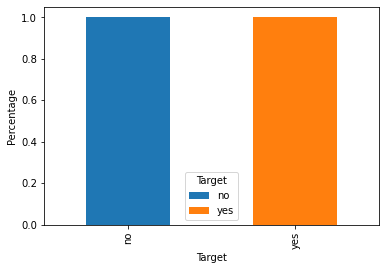

In [32]:
plt.figure(figsize=(15,15))
k = 0
print(cat_features)
for i in cat_features:
    k = k + 1
    x=pd.crosstab(df[i],df['Target'])
    x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
    plt.xlabel(i)
    plt.ylabel('Percentage')
    plt.show()

### Observation
 'student' and 'retired' clients having higher chances of the Target to be more positive.
 
 Clients with 'single' status having higher chances of Target to be more positive and  married and divorced having almost the equal chances
 
 Clients with 'teritary' education background having higher chances for the Target to be more positive.
 
 Clients having no previous default having double the chances of the Target to be more positive compare with those who had previous default history.
 
 Clients without 'housing loan' has triple the chances of subscribing to the term deposit compared with those with housing loans 

 Clients without 'loan' has double the chances of subscribing to the term deposit compared with those with the loans

 Clients with celluar & telephone almost equally shares the changes of subscribing, there are unknown modes of contact also contributed a little to the Target to be positiv

 Clients contacted during mar, sep, oct and dec was having more than 50% changes of the Target to be more positive.

 Clients from previous compaign with success status is more than 70% changes of the Target to be more positive


## Using Chi-square test we are finding whether the categorical variables 'job', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome' influence the dependent variable "Target"

In [33]:
df[cat_features].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,11,3,3,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9948,27214,24657,44396,25130,37967,29285,13766,36959,39922


### job Chi-Square Results - Since p < 0.05, job and Target is dependent we can keep this column

In [34]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(df["job"],
                   df['Target'])
chi2_contingency(cont)

(825.3444358404355,
 7.330985765626897e-171,
 10,
 array([[4566.0715755 ,  604.9284245 ],
        [8784.23516401, 1163.76483599],
        [1313.04359559,  173.95640441],
        [1094.93884232,  145.06115768],
        [8379.81420451, 1110.18579549],
        [2034.46701024,  269.53298976],
        [1394.28099356,  184.71900644],
        [3668.04512176,  485.95487824],
        [ 828.2682533 ,  109.7317467 ],
        [6708.26643958,  888.73356042],
        [1150.56879963,  152.43120037]]))

### education Chi-Square Results - Since p < 0.05, education and Target is dependent we can keep this column

In [35]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(df["education"],
                   df['Target'])
chi2_contingency(cont)

(235.6066187525242,
 6.897199498466207e-52,
 2,
 array([[ 6089.2727876 ,   806.7272124 ],
        [21772.5056734 ,  2884.4943266 ],
        [12060.22153901,  1597.77846099]]))

### marital Chi-Square Results - Since p < 0.05, marital and Target is dependent we can keep this column

In [36]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(df["marital"],
                   df['Target'])
chi2_contingency(cont)

(196.49594565603957,
 2.1450999986791792e-43,
 2,
 array([[ 4597.86012254,   609.13987746],
        [24030.37552808,  3183.62447192],
        [11293.76434938,  1496.23565062]]))

### default Chi-Square Results - Since p < 0.05, default and Target is dependent we can keep this column

In [37]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(df["default"],
                   df['Target'])
chi2_contingency(cont)

(22.20224995571685,
 2.4538606753508344e-06,
 1,
 array([[39202.34261574,  5193.65738426],
        [  719.65738426,    95.34261574]]))

### housing Chi-Square Results - Since p < 0.05, housing and Target is dependent we can keep this column

In [38]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(df["housing"],
                   df['Target'])
chi2_contingency(cont)

(874.822448867983,
 2.918797605076633e-192,
 1,
 array([[17731.82813917,  2349.17186083],
        [22190.17186083,  2939.82813917]]))

### loan Chi-Square Results - Since p < 0.05, loan and Target is dependent we can keep this column

In [39]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(df["loan"],
                   df['Target'])
chi2_contingency(cont)

(209.61698034978633,
 1.665061163492756e-47,
 1,
 array([[33525.4379244,  4441.5620756],
        [ 6396.5620756,   847.4379244]]))

### contact Chi-Square Results - Since p < 0.05, contact and Target is dependent we can keep this column

In [40]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(df["contact"],
                   df['Target'])
chi2_contingency(cont)

(1035.714225356292,
 1.251738325340638e-225,
 2,
 array([[25859.09999779,  3425.90000221],
        [ 2566.04215788,   339.95784212],
        [11496.85784433,  1523.14215567]]))

### month Chi-Square Results - Since p < 0.05, month and Target is dependent we can keep this column

In [41]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(df["month"],
                   df['Target'])
chi2_contingency(cont)

(3061.838938445269,
 0.0,
 11,
 array([[ 2589.00055296,   342.99944704],
        [ 5516.19592577,   730.80407423],
        [  188.96525182,    25.03474818],
        [ 2339.10725266,   309.89274734],
        [ 1238.87031917,   164.12968083],
        [ 6088.3897724 ,   806.6102276 ],
        [ 4716.18415872,   624.81584128],
        [  421.19824821,    55.80175179],
        [12155.58718011,  1610.41281989],
        [ 3505.57032581,   464.42967419],
        [  651.66521422,    86.33478578],
        [  511.26579815,    67.73420185]]))

### poutcome Chi-Square Results - Since p < 0.05, poutcome and Target is dependent we can keep this column

In [42]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(df["poutcome"],
                   df['Target'])
chi2_contingency(cont)

(4391.5065887686615,
 0.0,
 3,
 array([[ 4327.65747274,   573.34252726],
        [ 1624.74795957,   215.25204043],
        [ 1334.23596028,   176.76403972],
        [32635.35860742,  4323.64139258]]))

## Checking Outliers

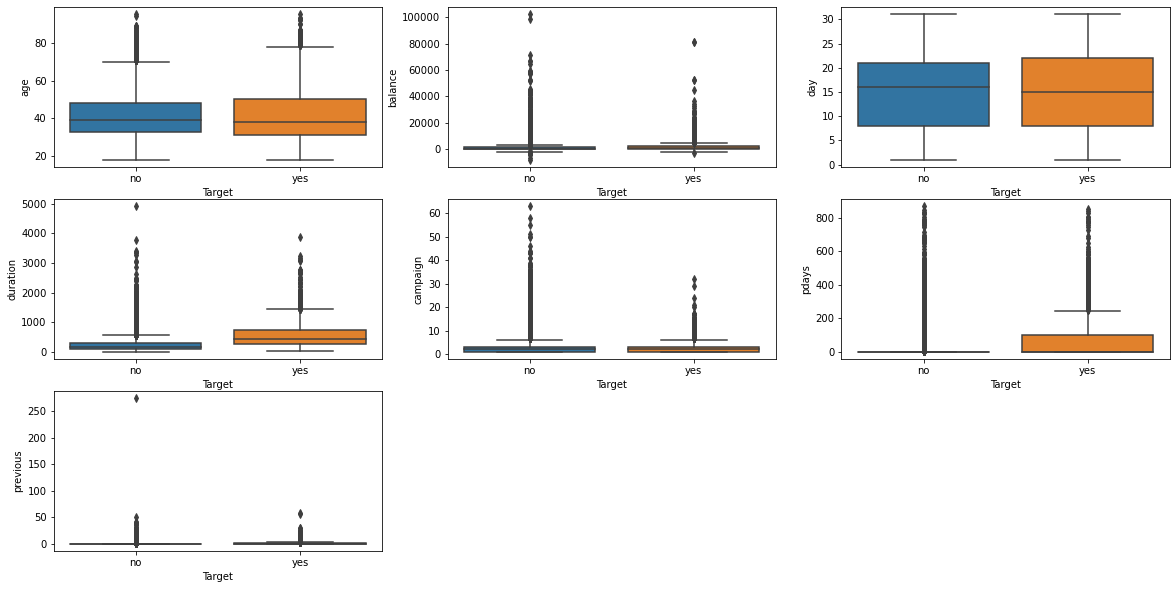

In [43]:
# Checking Outliers by Target column
plt.figure(figsize=(20,10))
for i,col in enumerate(num_features,start=1):
    plt.subplot(3,3,i);
    sns.boxplot(y=df[col],x=df[target]);
plt.show()

<Figure size 1440x720 with 0 Axes>

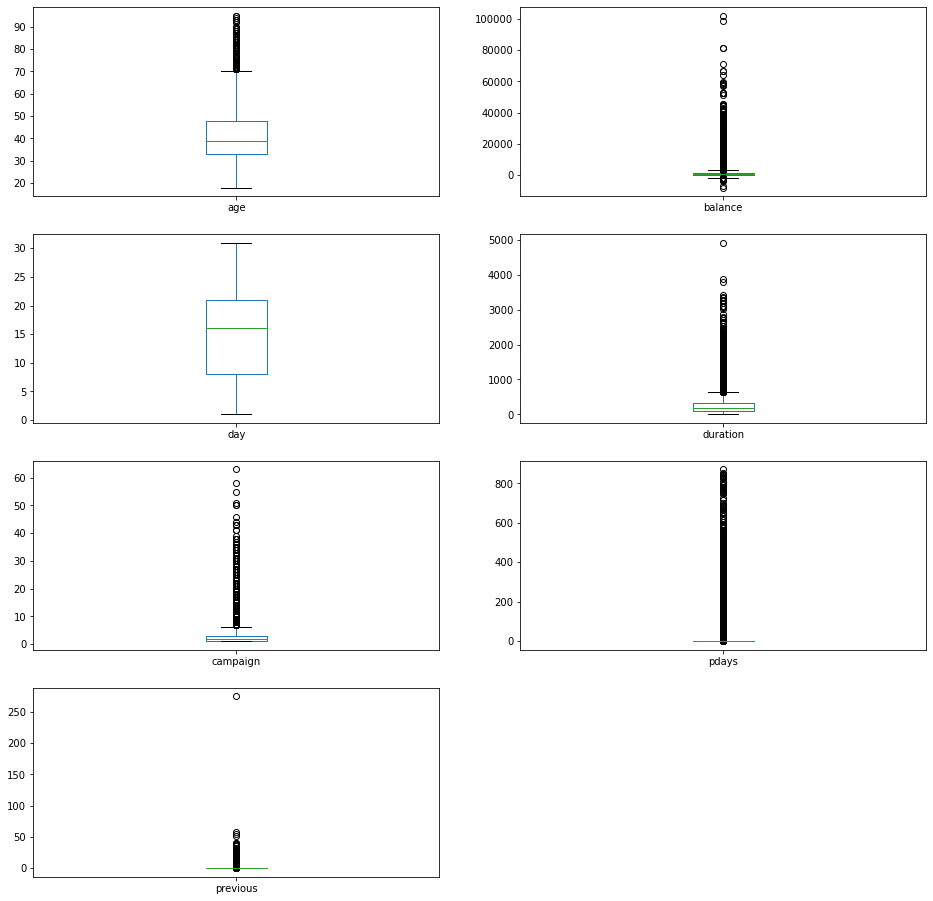

<Figure size 1440x720 with 0 Axes>

In [44]:
# Checking the presence of Outliers by individual columns
df[num_features].plot(kind='box',subplots=True, layout=(4,2), fontsize=10, figsize=(16,16));
plt.figure(figsize=(20,10))

## Observation 
age, balance, duration, compaign, pdays and previous attributes have ouliers.

day attribute has balance data

In [45]:
df.groupby('Target')['pdays'].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
no,39922.0,36.421372,96.757135,-1.0,-1.0,-1.0,-1.0,871.0
yes,5289.0,68.702968,118.822266,-1.0,-1.0,-1.0,98.0,854.0


### Observation
PDays (mean) is <b> -1 pdays </b> (no contact since last campaign) or <b> higher pdays </b>  (no. of days passed by after the client was last contacted from a previous campaign) have <b> negative impact </b> on output which means <b> LESS CHANCES </b> for bank term deposits subscription

## No. of Outliers vs Non-Outliers for each column

In [46]:

def find_outlier(df, num_features):
    q25 = df[num_features].quantile(0.25)
    q75 = df[num_features].quantile(0.75)
    iqr = q75-q25 #Interquartile range
    lower, upper  = q25-1.5*iqr, q75+1.5*iqr
    outliers_df = df[(df[num_features] < lower) | (df[num_features] > upper)]
    outliers_removed_df = df[(df[num_features] >= lower) & (df[num_features] <= upper)]
    
    print(' \'{}\': {} /{}'.format(
        num_features, outliers_df.shape[0], outliers_removed_df.shape[0]))

for feature in num_features:
    find_outlier(df, feature)

 'age': 487 /44724
 'balance': 4729 /40482
 'day': 0 /45211
 'duration': 3235 /41976
 'campaign': 3064 /42147
 'pdays': 8257 /36954
 'previous': 8257 /36954


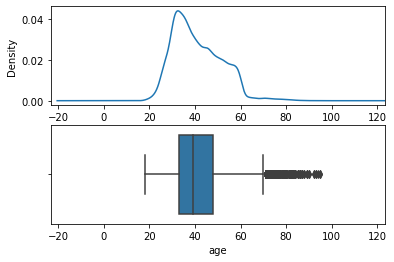

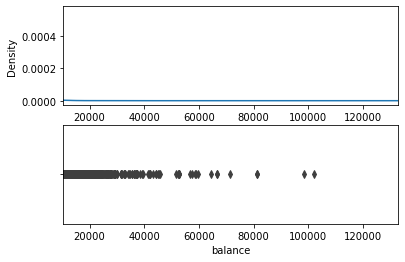

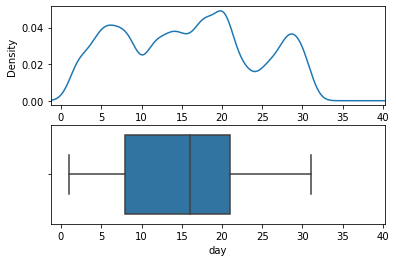

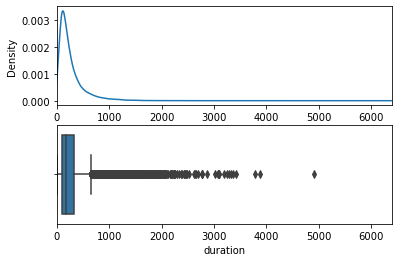

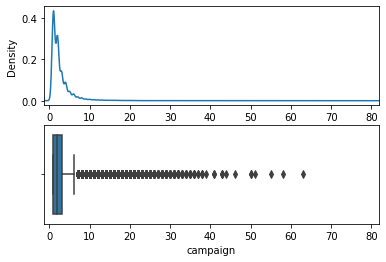

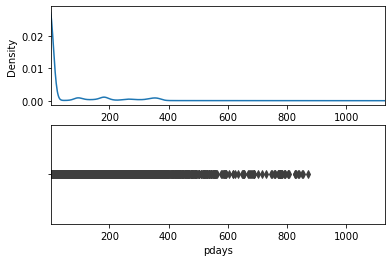

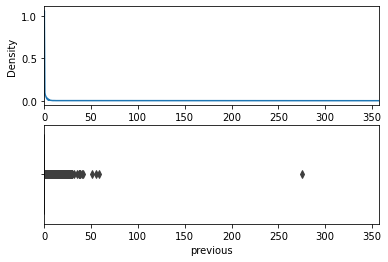

In [47]:
# For each predictors finding outliers using visualization (boxplot) and the distrubution plot (look for skewness)

def plot_outliers(df_in,num_features):
    plt.figure(figsize=(6,4))
    plt.subplot(211)
    plt.xlim(df[num_features].min()*-1.3, df_in[num_features].max()*1.3)
 
    ax = df_in[num_features].plot(kind='kde')
 
    plt.subplot(212)
    plt.xlim(df[num_features].min()*-1.3, df_in[num_features].max()*1.3)
    sns.boxplot(x=df[num_features])
    
for feature in num_features:
    plot_outliers(df, feature)

## Treatment of Outliers

In [48]:
withOutliers = ['age','balance','duration', 'campaign']    
 
iqr   = df[withOutliers].describe().T['75%']-df[withOutliers].describe().T['25%']
q1    = df[withOutliers].describe().T['25%']-(iqr*1.5)
q3    = df[withOutliers].describe().T['75%']+(iqr*1.5)

for i in withOutliers:
    df[i][df[i]>q3[i]]=q3[i]
    df[i][df[i]<q1[i]]=q1[i]

C:\Users\Surya\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Surya\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Surya\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Surya\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A

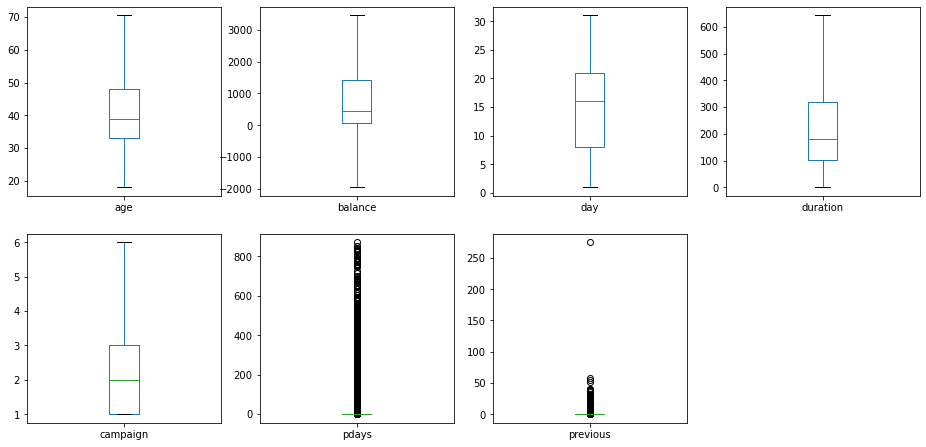

In [49]:
# Checking the presence of Outliers after treatment
df[num_features].plot(kind='box',subplots=True, layout=(4,4), fontsize=10, figsize=(16,16));

In [50]:
#pip install statsmodels

In [51]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

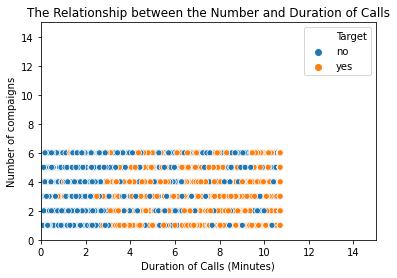

In [52]:
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = df,hue = 'Target')
plt.axis([0,15,0,15])
plt.ylabel('Number of compaigns')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
# Annotation
plt.show()

### Observation
<b> Longer the duration </b> of the calls shows the positive impact on the Target to be Yes 

Target        no       yes
month                     
apr     0.052089  0.012762
aug     0.122957  0.015218
dec     0.002522  0.002212
feb     0.048838  0.009754
jan     0.027891  0.003141
jul     0.138639  0.013868
jun     0.106058  0.012077
mar     0.005065  0.005485
may     0.284024  0.020460
nov     0.078897  0.008914
oct     0.009179  0.007144
sep     0.006857  0.005950


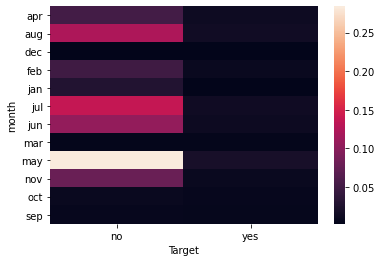

In [53]:
# Heatmap - month vs Target
mon = pd.crosstab(df[ "month"], df[ "Target"]).apply(lambda r: r/len(df))
print(mon)
sns.heatmap(mon)

### Observation 
Correlation between each month and the Target variables. The correlation shows mar, oct, sep and dec is highly correlated  

### Let us see the correlation of all the numerical variables with dependent and independent variables

In [54]:
df['Target'].replace('no', 0,inplace=True)
df['Target'].replace('yes', 1,inplace=True)

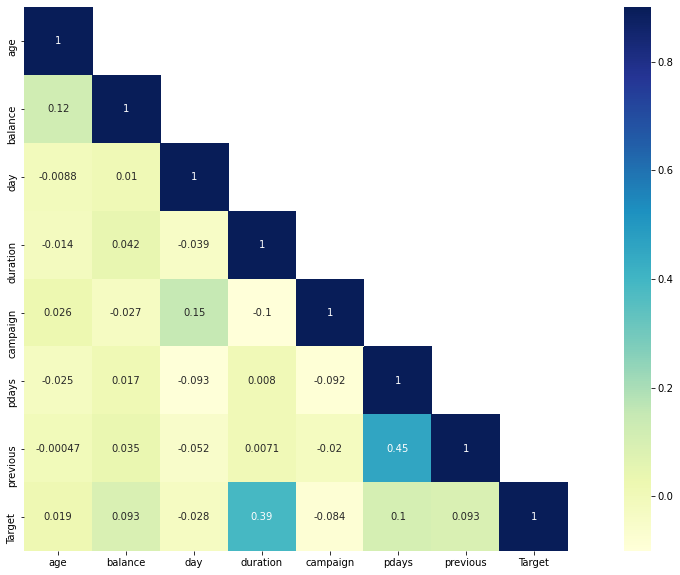

In [55]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

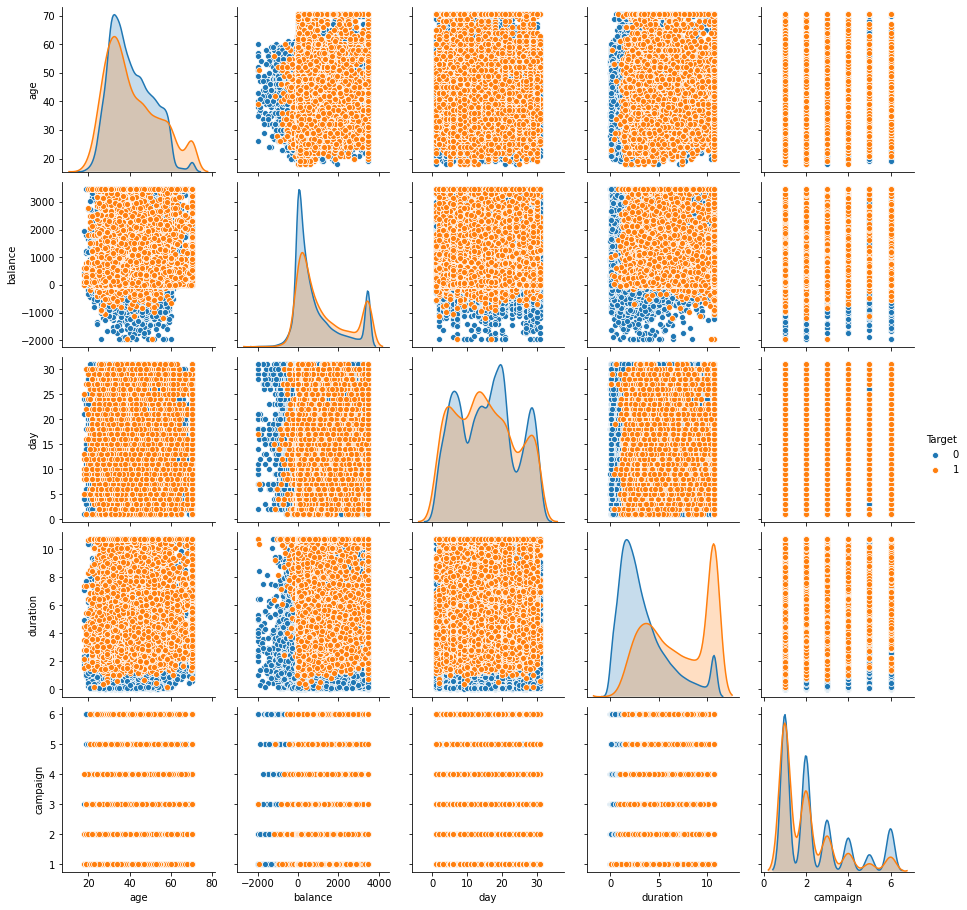

In [56]:
df.drop('pdays',axis=1,inplace=True)     # pdays and previous are correlated, but nan with Target
df.drop('previous',axis=1,inplace=True)  # pdays and previous are correlated, but nan with Target
sns.pairplot(df,hue='Target')

# Deliverable – 2 (Prepare the data for analytics) – (10)

In [57]:
oneHotCols=['job','marital','education','default','housing','loan','contact','month','poutcome']

In [58]:
#One hot encoding for the categorical variables.
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,age,balance,day,duration,campaign,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2143,5,4.35,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44.0,29,5,2.52,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,2,5,1.27,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,47.0,1506,5,1.53,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33.0,1,5,3.30,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5,35.0,231,5,2.32,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,28.0,447,5,3.62,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,42.0,2,5,6.33,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8,58.0,121,5,0.83,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,43.0,593,5,0.92,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [59]:
#check the variables for which correlation with Target lies in the range -0.09 to 0.09 .

#print(df.corr(method='pearson'),"\n")

print("\n\n Variables for which the correlation with Target lies in the range -0.09 to 0.09")
corr_matrix = df.corr(method='pearson')
corr_value = corr_matrix.iloc[5,:] #6th - Target
for i in corr_value.index:
    if ((corr_value[i] >= -0.09) & (corr_value[i] <= 0.09)):
       print("\b",i,corr_value[i])



 Variables for which the correlation with Target lies in the range -0.09 to 0.09
 age 0.018975527448040725
 day -0.02834777672093533
 campaign -0.08406120581235904
 job_admin. 0.005637468879355817
 job_blue-collar -0.07139282143041317
 job_entrepreneur -0.019662309731875695
 job_housemaid -0.015194864634460938
 job_management 0.03292129371904239
 job_retired 0.07837840180507717
 job_self-employed 0.0008550305237892782
 job_services -0.027863949421395206
 job_student 0.07689701944354205
 job_technician -0.00896981534624379
 job_unemployed 0.020389921362209972
 marital_divorced 0.0027723674615931842
 marital_married -0.06026038456976864
 marital_single 0.06352577267586335
 education_primary -0.040527034182656074
 education_secondary -0.034067465015066925
 education_tertiary 0.06867723489562919
 default_no 0.02241896589073529
 default_yes -0.02241896589073529
 loan_no 0.06818503472417951
 loan_yes -0.06818503472417951
 contact_telephone 0.014042471738762469
 mo

In [60]:
# DROP THE VARIABLES for which correlation with Target lies in the range -0.09 to 0.09
df_z2 = pd.DataFrame(df)
corr_matrix = df.corr()
corr_value = corr_matrix.iloc[5,:] #6th - Target
for i in corr_value.index:
    if ((corr_value[i] >= -0.09) & (corr_value[i] <= 0.09)):
        df_z2.drop(i,axis=1,inplace=True)
        print("Dropped ",i," with correlation of ",corr_value[i])

Dropped  age  with correlation of  0.018975527448040725
Dropped  day  with correlation of  -0.02834777672093533
Dropped  campaign  with correlation of  -0.08406120581235904
Dropped  job_admin.  with correlation of  0.005637468879355817
Dropped  job_blue-collar  with correlation of  -0.07139282143041317
Dropped  job_entrepreneur  with correlation of  -0.019662309731875695
Dropped  job_housemaid  with correlation of  -0.015194864634460938
Dropped  job_management  with correlation of  0.03292129371904239
Dropped  job_retired  with correlation of  0.07837840180507717
Dropped  job_self-employed  with correlation of  0.0008550305237892782
Dropped  job_services  with correlation of  -0.027863949421395206
Dropped  job_student  with correlation of  0.07689701944354205
Dropped  job_technician  with correlation of  -0.00896981534624379
Dropped  job_unemployed  with correlation of  0.020389921362209972
Dropped  marital_divorced  with correlation of  0.0027723674615931842
Dropped  marital_married  

In [61]:
df_z2['Target'] = df_z2['Target'].astype('category')
df_z2.describe()

,balance,duration,housing_no,housing_yes,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,933.706974,3.915901,0.444162,0.555838,0.647741,0.287983,0.010551,0.304483,0.016323,0.012807,0.033421,0.817478
std,1176.765369,2.946376,0.496878,0.496878,0.477680,0.452828,0.102174,0.460193,0.126718,0.112441,0.179735,0.386278
min,-1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,1.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,448.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1428.000000,5.320000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,3462.000000,10.720000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
## splitting df_z2 into training and test set in the ratio of 70:30 (Training:Test) based on depdendent and independent variables.

In [63]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

features = [col for col in df_z2.columns if col != 'Target']
X_train, X_test, y_train, y_test = train_test_split(df_z2[features], df_z2['Target'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

((31647, 12), (13564, 12))

# Deliverable – 3 (create the ensemble model) – (30)

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

#Initialising Logistic Regression
lr_clf=LogisticRegression()

#Fitting on data
lr_clf.fit(X_train, y_train)

#Scoring the model on train data
print("Training Accuracy :\t ", lr_clf.score(X_train, y_train))

#Scoring the model on test_data
print("Testing Accuracy :\t  ",  lr_clf.score(X_test, y_test))

y_pred = lr_clf.predict(X_test)

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Accuracy :	  0.898252598982526
Testing Accuracy :	   0.8970067826599823


In [65]:
metrics.confusion_matrix(y_pred, y_test)

array([[11640,  1064],
       [  333,   527]], dtype=int64)

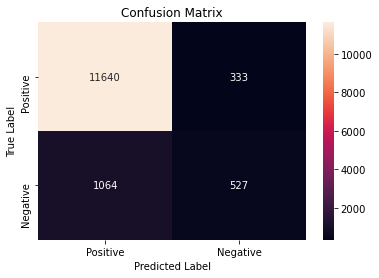

In [66]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [67]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns

from sklearn.tree import DecisionTreeClassifier

model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
#Print the accuracy of the model & print the confusion matrix
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 0.99
Test: 0.86


There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting.

Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [69]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.90
Test: 0.90


## Observation:
### The Train and Test Data is NEITHER OVERFIT NOR UNDERFIT

### Visualizing the tree

In [71]:
#pip install Graphviz
#pip install graphviz

In [72]:
#!pip install pydotplus

In [73]:
y_train.value_counts()

0    27949
1     3698
Name: Target, dtype: int64

In [74]:
#pip install --upgrade scikit-learn==0.20.3 

In [75]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

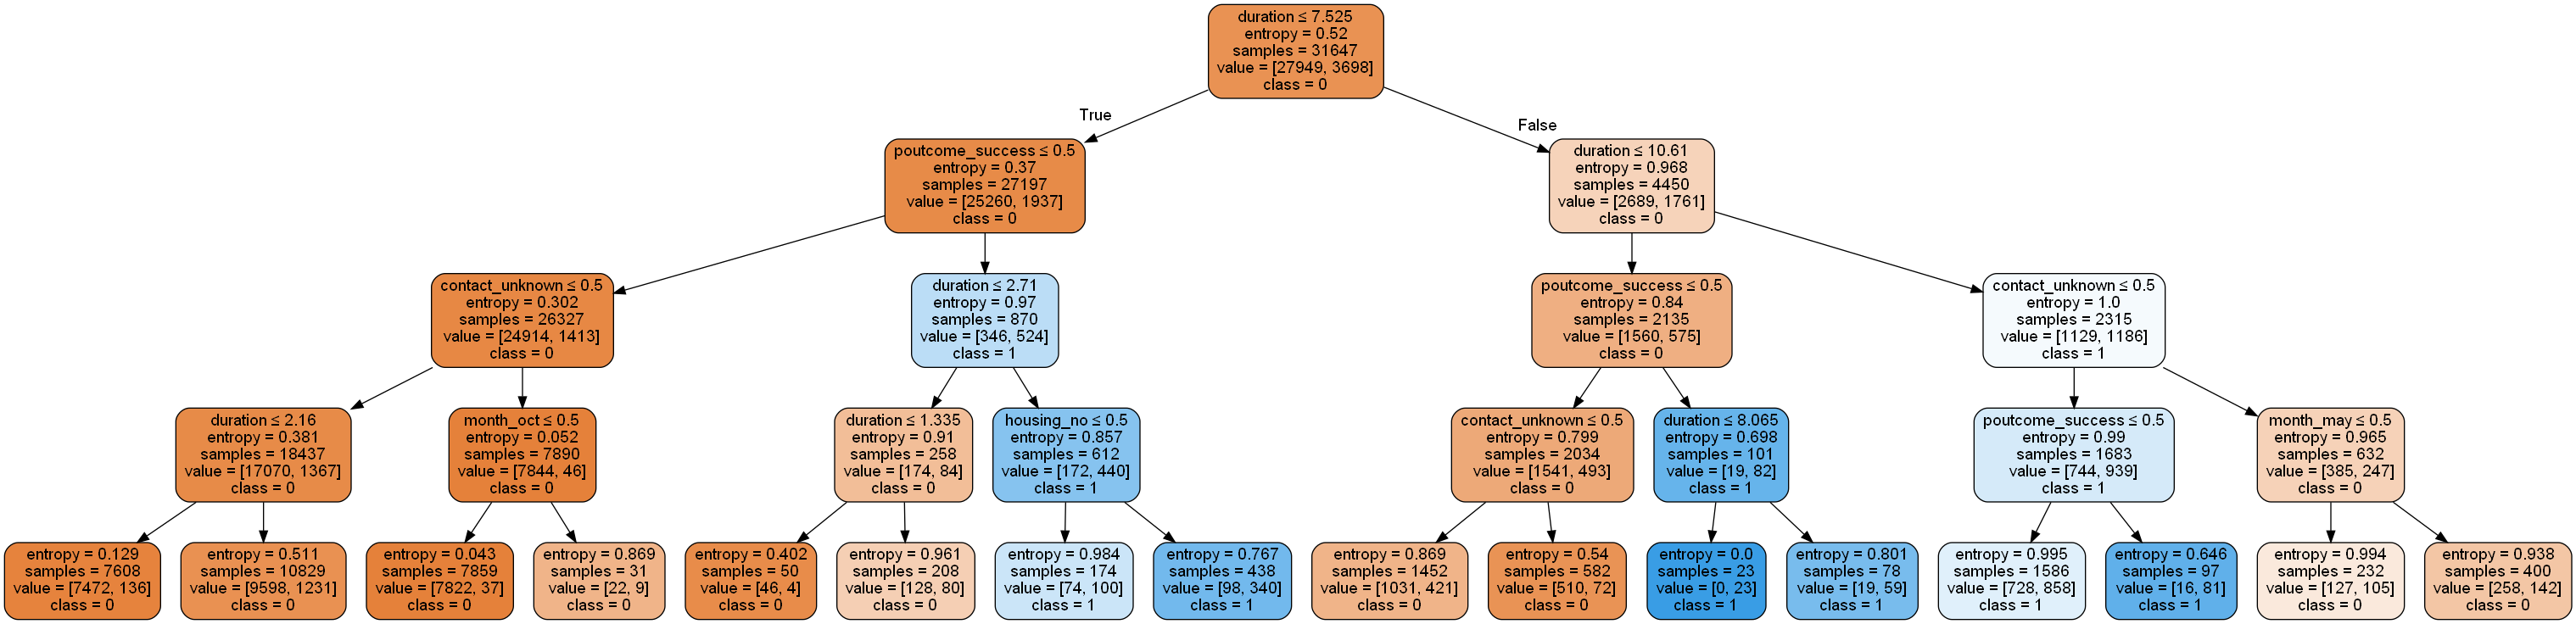

In [76]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('termdeposit_pruned.png')
Image(graph.create_png())

In [77]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

# Decision tree performance

In [78]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11566,407
1,966,625


In [79]:
#pip install yellowbrick  

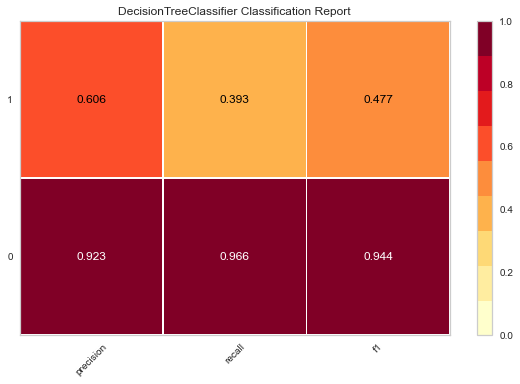

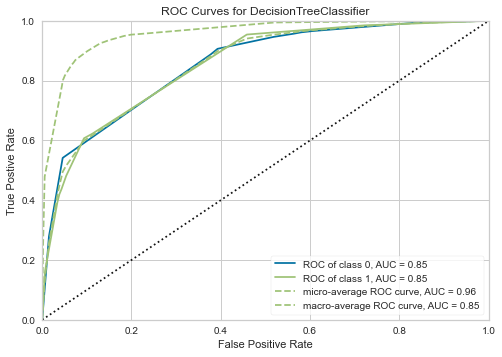

In [80]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

#### Performance metrics

- __Precision__: Fraction of actuals per label that were correctly classified by the model
- __Recall__: Fraction of predictions that were correctly classified by the model
- __F1-score__: Weighted harmonic mean of the precision and recall. F1-score: 2 * (precision * recall) / (precision + recall)
- __Support__: Number of occurrences of each class in y_test
- __Accuracy__: Fraction of all observations that were correctly classified by the model
- __Macro avg__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
- __Micro/weighted avg__: Calculate metrics globally by counting the total true positives, false negatives and false positives
- __AUC Score__: Given a random observation from the dataset that belongs to a class, and a random observation that doesn't belong to a class, the AUC is the perecentage of time that our model will classify which is which correctly

In [81]:
df_z2['Target_0'] = clf_pruned.predict_proba(df[features])[:,0]
df_z2['Target_1'] = clf_pruned.predict_proba(df[features])[:,1]
df_z2.head(10)

,balance,duration,Target,housing_no,housing_yes,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown,Target_0,Target_1
0,2143,4.35,0,0,1,0,1,0,1,0,0,0,1,0.995292,0.004708
1,29,2.52,0,0,1,0,1,0,1,0,0,0,1,0.995292,0.004708
2,2,1.27,0,0,1,0,1,0,1,0,0,0,1,0.995292,0.004708
3,1506,1.53,0,0,1,0,1,0,1,0,0,0,1,0.995292,0.004708
4,1,3.30,0,1,0,0,1,0,1,0,0,0,1,0.995292,0.004708
5,231,2.32,0,0,1,0,1,0,1,0,0,0,1,0.995292,0.004708
6,447,3.62,0,0,1,0,1,0,1,0,0,0,1,0.995292,0.004708
7,2,6.33,0,0,1,0,1,0,1,0,0,0,1,0.995292,0.004708
8,121,0.83,0,0,1,0,1,0,1,0,0,0,1,0.995292,0.004708
9,593,0.92,0,0,1,0,1,0,1,0,0,0,1,0.995292,0.004708


In [82]:
feature_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

feature_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feature_imp = pd.DataFrame.from_dict(feature_imp_dict, orient='index')
feature_imp.sort_values(by=0, ascending=False)

,0
duration,0.583355
poutcome_success,0.284002
contact_unknown,0.119991
month_oct,0.008323
housing_no,0.003481
month_may,0.000848
balance,0.000000
housing_yes,0.000000
contact_cellular,0.000000
month_mar,0.000000


### Observation
#### From the feature importance dataframe we can infer that duration, poutcome_success, contact_unknown, month_oct, housing_no and month_may are the variables that impact Target

In [83]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.898776


### Apply the Random forest model and print the accuracy of Random forest Model

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [85]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [86]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.898776
0,Random Forest,0.885506


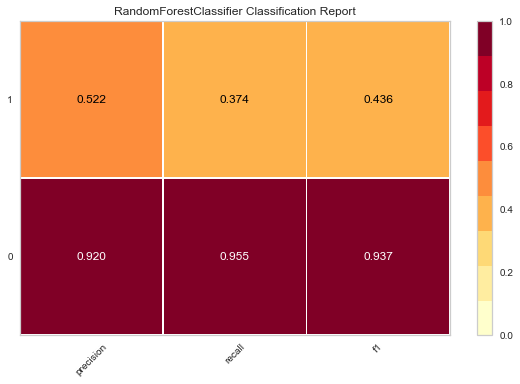

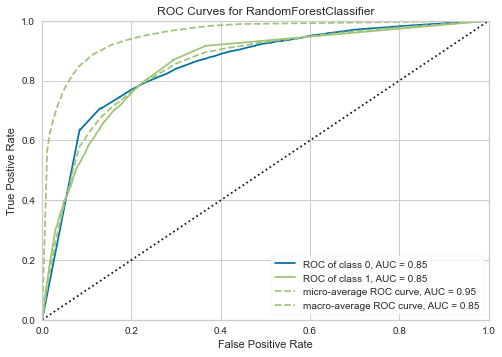

In [87]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [88]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [89]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [90]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.898776
0,Random Forest,0.885506
0,Adaboost,0.894721


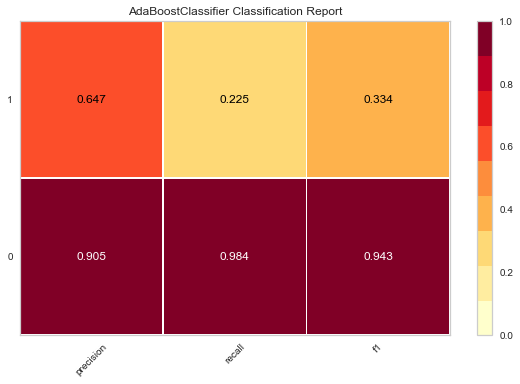

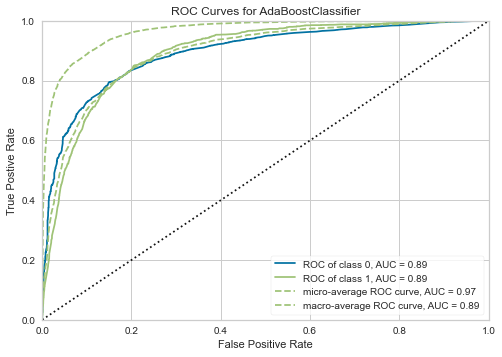

In [91]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Apply Bagging Classifier Algorithm and print the accuracy

In [92]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [93]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [94]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.898776
0,Random Forest,0.885506
0,Adaboost,0.894721
0,Bagging,0.889413


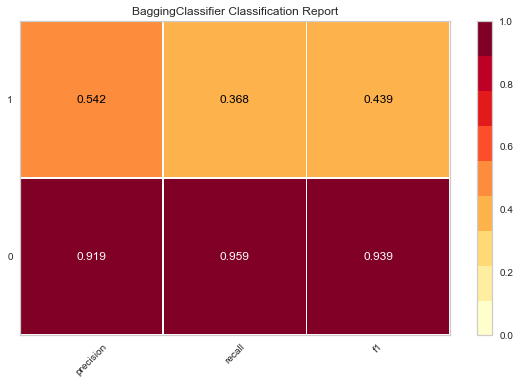

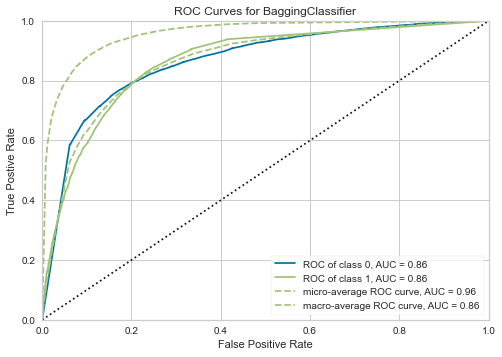

In [95]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [97]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB) 

In [98]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.898776
0,Random Forest,0.885506
0,Adaboost,0.894721
0,Bagging,0.889413
0,Gradient Boost,0.899366


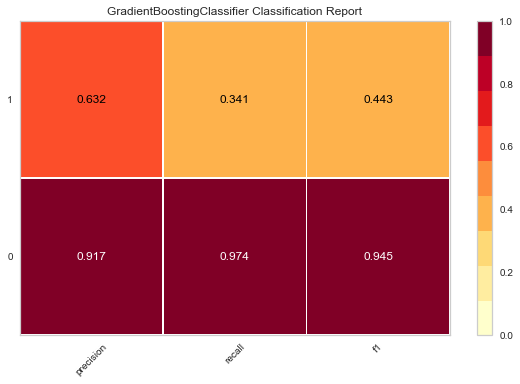

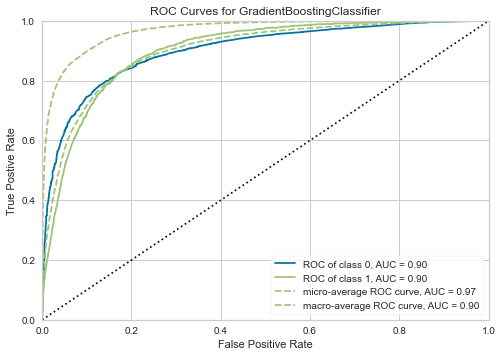

In [99]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

# Conclusion of the Model
## For this dataset, GradientBoosting gives the best results on test predictions

In [100]:
# Creating a function for visualizing classifier results
def visClassifierResults(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()

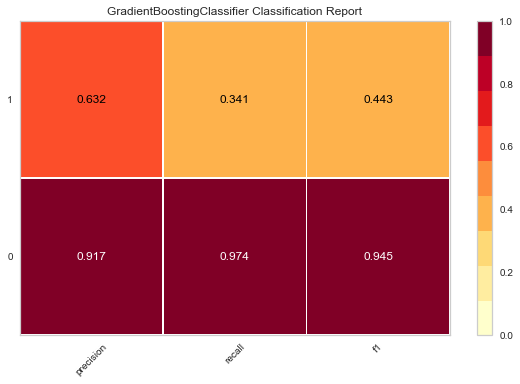

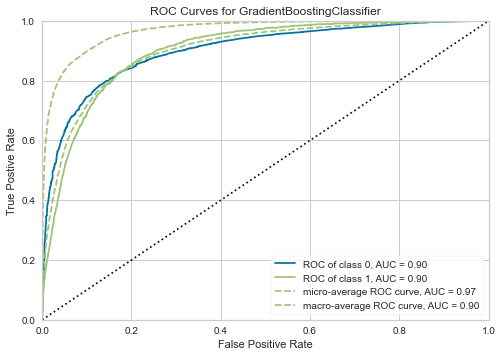

In [101]:
visClassifierResults(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))

# END OF PROJECT